<a href="https://colab.research.google.com/github/196h/marketing-performan/blob/main/train_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Titanic Dataset Analysis and Preprocessing


**# Step 1: Import Required Libraries**







In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Step 2: Load the Dataset**

In [4]:
df = pd.read_csv("/content/train (1) (5).csv")

### **Step 3: Preview the Data**

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Step 4: Check Dataset Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Step 5: Summary Statistics**

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Step 6: Remove Duplicate Rows**

In [8]:
df_cleaned = df.drop_duplicates()


### **Step 7: Remove Fully Empty Rows**

In [9]:
df_cleaned = df_cleaned.dropna(how='all')

### **Step 8: Fill Missing Values**


In [10]:
df_cleaned = df_cleaned.fillna({
    'Age': df_cleaned['Age'].median(),
    'Embarked': df_cleaned['Embarked'].mode()[0],
    'Cabin': 'Unknown'
})

### **Step 9: Create New Feature Columns**

In [11]:
df['IsChild'] = df['Age'] < 18
df['WithFamily'] = (df['SibSp'] > 0) | (df['Parch'] > 0)
df['FareRange'] = pd.qcut(df['Fare'], 3, labels=['Low', 'Medium', 'High'])
df['GroupSize'] = df['SibSp'] + df['Parch'] + 1

### **Step 10: Group Data by Class and Gender**


In [12]:
grouped = df.groupby(['Pclass', 'Sex']).agg({
    'Age': 'mean',
    'Fare': 'mean',
    'Survived': 'sum'
}).reset_index()

grouped.to_csv("grouped_data.csv", index=False)

grouped

,Pclass,Sex,Age,Fare,Survived
0,1,female,34.611765,106.125798,91
1,1,male,41.281386,67.226127,45
2,2,female,28.722973,21.970121,70
3,2,male,30.740707,19.741782,17
4,3,female,21.750000,16.118810,72
5,3,male,26.507589,12.661633,47


### **Step 13: Calculate Survival Rate by Gender**

In [13]:
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
gender_survival


,Survived
Sex,
female,74.203822
male,18.890815


### **Step 13: Calculate Survival Rate by Gender**

In [14]:

class_survival = df.groupby('Pclass')['Survived'].mean() * 100
class_survival

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


### **Step 15: Calculate Survival Rate by Age Group (Child vs. Adult) and Calculate Survival Rate by Port of Embarkation**

In [15]:
age_group_survival = df.groupby('IsChild')['Survived'].mean() * 100
port_survival_rate = df.groupby('Embarked')['Survived'].mean() * 100
age_group_survival
port_survival_rate

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


### **Step 16: Calculate Survival Rate by Family Presence, Fare Range, and Group Size**

In [16]:
family_survival = df.groupby('WithFamily')['Survived'].mean() * 100
fare_range_survival = df.groupby('FareRange', observed=False)['Survived'].mean() * 100
group_size_survival = df.groupby('GroupSize')['Survived'].mean() * 100

# 📊 Data Visualizations

### **Step 17: Set Seaborn Style to White Grid for Better Visualization**

In [18]:
sns.set(style="whitegrid")

### **Step 18: Calculate and Visualize the Overall Survival Rate**

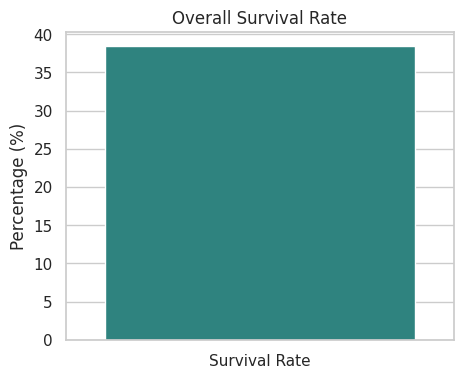

In [23]:
overall_survival_rate = df['Survived'].mean() * 100

plt.figure(figsize=(5,4))
sns.barplot(x=["Survival Rate"], y=[overall_survival_rate], hue=["Survival Rate"], palette="viridis", legend=False)
plt.ylabel("Percentage (%)")
plt.title("Overall Survival Rate")
plt.show()

### **Step 19: Visualize Survival Rate by Passenger Class**

/tmp/ipython-input-1393888168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_survival.index, y=class_survival.values, palette="Blues")


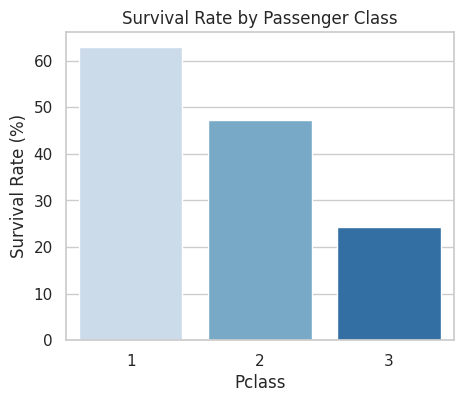

In [21]:
plt.figure(figsize=(5,4))
sns.barplot(x=class_survival.index, y=class_survival.values, palette="Blues")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class")
plt.show()

### **Step 20: Visualize Survival Rate – Children vs Adults**

/tmp/ipython-input-513406530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Adult", "Child"], y=age_group_survival.values, palette="mako")


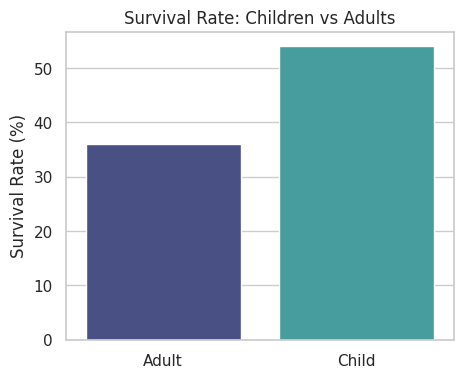

In [24]:
plt.figure(figsize=(5,4))
sns.barplot(x=["Adult", "Child"], y=age_group_survival.values, palette="mako")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate: Children vs Adults")
plt.show()


### **Step 21: Visualize Survival Rate by Port of Embarkation**

/tmp/ipython-input-3850516921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=port_survival_rate.index, y=port_survival_rate.values, palette="crest")


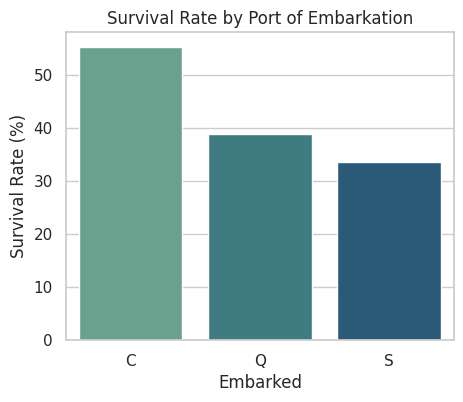

In [26]:
plt.figure(figsize=(5,4))
sns.barplot(x=port_survival_rate.index, y=port_survival_rate.values, palette="crest")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Port of Embarkation")
plt.show()

### **Step 22: Analysis of Survival Rates Based on Traveling Alone or With Family**

/tmp/ipython-input-3901187702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Alone","With Family"], y=family_survival.values, palette="flare")


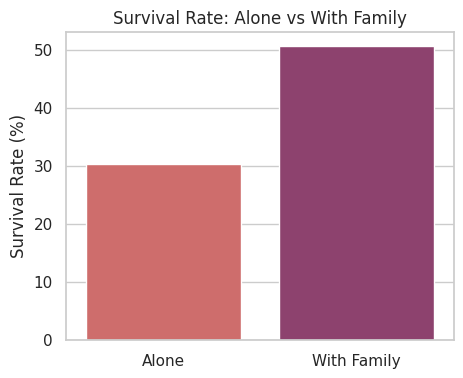

In [27]:
plt.figure(figsize=(5,4))
sns.barplot(x=["Alone","With Family"], y=family_survival.values, palette="flare")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate: Alone vs With Family")
plt.show()


## **Step 23: Analysis of Survival Rate According to Fare Price Categories**

/tmp/ipython-input-769198749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_range_survival.index, y=fare_range_survival.values, palette="Spectral")


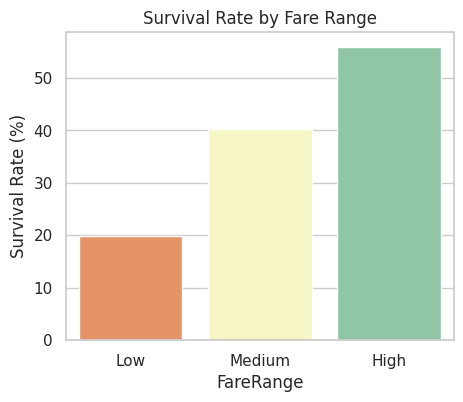

In [28]:
plt.figure(figsize=(5,4))
sns.barplot(x=fare_range_survival.index, y=fare_range_survival.values, palette="Spectral")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Fare Range")
plt.show()

### **Step 24: Analysis of Survival Rate Based on Group Size**

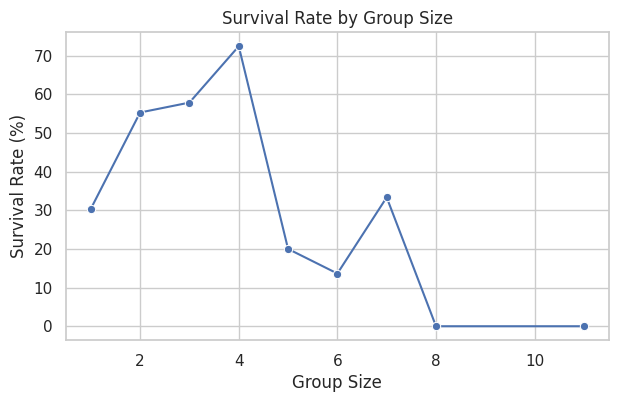

In [29]:
plt.figure(figsize=(7,4))
sns.lineplot(x=group_size_survival.index, y=group_size_survival.values, marker="o")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Group Size")
plt.title("Survival Rate by Group Size")
plt.show()


### **Step 25: Visualize Survival Rate by Gender and Passenger Class**

/tmp/ipython-input-678066161.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, ci=None, palette="coolwarm")


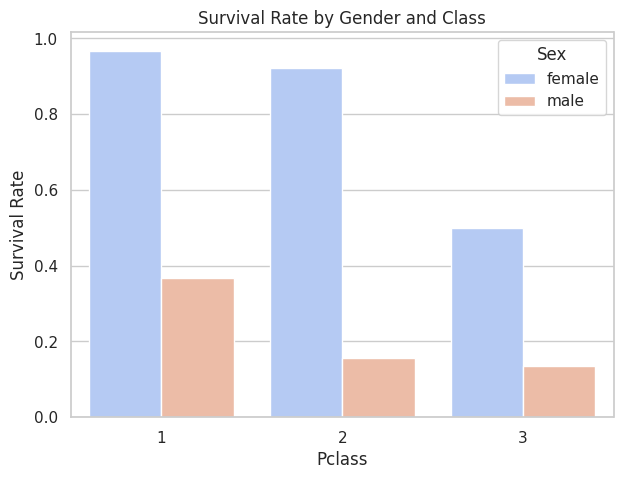

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, ci=None, palette="coolwarm")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender and Class")
plt.show()